In [1]:
import pandas as pd

df = pd.read_csv("insurance_1338.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **Analisar os dados com shape**

In [ ]:
df.shape

In [ ]:
import matplotlib.pyplot as plt

# Criar o gráfico de boxplot (Gráfico de caixas) Quartis, mediana e os outliers
plt.boxplot(df['bmi'])
plt.title('bmi')
plt.ylabel('Valores')
plt.show()

In [ ]:
print(df['bmi'].min())
print(df['bmi'].max())
print(df['bmi'].median())

In [ ]:
import matplotlib.pyplot as plt

# Criar o gráfico de boxplot (Gráfico de caixas) Quartis, mediana e os outliers
plt.boxplot(df['age'])
plt.title('age')
plt.ylabel('Valores')
plt.show()

In [ ]:
print(df['age'].min())
print(df['age'].max())
print(df['age'].median())

In [ ]:
df.head()

In [2]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() #É melhor de usar do que o OneHotEncoder, pois não aumenta a dimensão dos dados.

# Ajustar e transformar os rótulos
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [3]:
import numpy as np
np.random.seed(42)

df["bmi"] = pd.cut(df["bmi"],
                               bins=[0, 15, 20.0, 29.9, 34.9, 39.9, np.inf],
                               labels=[1, 2, 3, 4, 5, 6])
#df["age"] = pd.cut(df["age"],
#                               bins=[0, 18, 25, 30, 45, 50, 55, 60, np.inf],
#                               labels=[1, 2, 3, 4, 5, 6, 7, 8])

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,3,0,1,3,16884.92400
1,18,1,4,1,0,2,1725.55230
2,28,1,4,3,0,2,4449.46200
3,33,1,3,0,0,1,21984.47061
4,32,1,3,0,0,1,3866.85520


OK, como próximo passo, antes de normalizar ou padronizar, vamos separar os dados em treino e teste:

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['charges']) # Variáveis características
y = df['charges'] # O que eu quero prever. (Target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Quanto a esses detalhes de separação de dados em treino e teste, não se preocupe que em Machine Learning avançado você irá aprender cada passo! 😄

Vamos escalonar os dados? Importamos os escalonadores da biblioteca **sklearn** em **preprocessing** o **StandardScaler** e **MinMaxScaler**:

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

**Aplicando MinMax Scaler - Normalização**

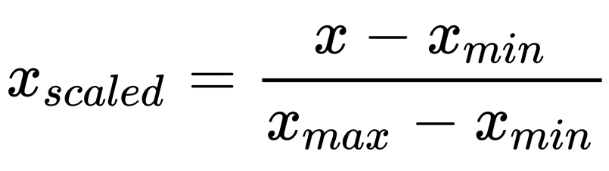

O escalonamento min-max (normalização) é muito simples! Basicamente os valores são deslocados e redimensionados para que acabem variando de 0 a 1. Observe a fórmula a seguir, esse cálculo subtrai o valor mínimo e divide pelo máximo, menos o mínimo.


In [7]:
scaler = MinMaxScaler() #chamando o metodo de normalização dos dados (0-1)

scaler.fit(X_train)

x_train_min_max_scaled = scaler.transform(X_train)
x_test_min_max_scaled= scaler.transform(X_test)

In [8]:
x_train_min_max_scaled

array([[0.60869565, 0.        , 0.        , 0.4       , 0.        ,
        0.33333333],
       [0.63043478, 0.        , 0.25      , 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.        , 0.25      , 0.        , 0.        ,
        0.66666667],
       ...,
       [0.86956522, 1.        , 0.25      , 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.        , 1.        , 0.4       , 1.        ,
        1.        ],
       [0.80434783, 1.        , 0.25      , 0.        , 0.        ,
        1.        ]])

Mas você deve estar se perguntando:

*“por que é realizado o escalonamento (fit) na base treino e não na base de teste?”.*

Bem, realizamos a transformação do escalonamento na base de treino para **evitar que a base de teste fique exatamente igual às estatísticas da base de treino**, o que evita **“vazamento”** desses dados. A base de teste em geral deve representar uma base de dados nunca vista antes pelo algoritmo, justamente para testar se o algoritmo consegue generalizar os dados.


Agora vamos testar com **StandarScaler**.

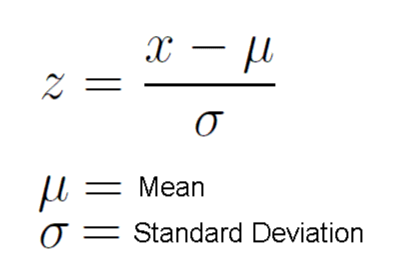

A padronização não vincula valores específicos nos mínimos e máximos, o que pode ser um ponto de atenção em alguns algoritmos (por exemplo, redes neurais). No entanto, a padronização é muito menos afetada por outliers.  Na biblioteca do Scikit-Learn temos a padronização em StandardScaler.




In [9]:
scaler = StandardScaler() #chamando o metodo de padronização dos dados (média e std)

scaler.fit(X_train)# qual média e std será utilizado para o escalonamento

x_train_standard_scaled = scaler.transform(X_train)
x_test_standard_scaled  = scaler.transform(X_test)

In [10]:
x_train_standard_scaled

array([[ 0.47222651, -1.0246016 , -1.8440754 ,  0.73433626, -0.50874702,
        -0.45611589],
       [ 0.54331294, -1.0246016 , -0.81692252, -0.91119211, -0.50874702,
        -1.35325561],
       [ 0.8987451 , -1.0246016 , -0.81692252, -0.91119211, -0.50874702,
         0.44102382],
       ...,
       [ 1.3252637 ,  0.97598911, -0.81692252, -0.91119211, -0.50874702,
        -1.35325561],
       [-0.16755139, -1.0246016 ,  2.26453612,  0.73433626,  1.96561348,
         1.33816354],
       [ 1.1120044 ,  0.97598911, -0.81692252, -0.91119211, -0.50874702,
         1.33816354]])

In [11]:
from sklearn.linear_model import LinearRegression

Vamos testar o algoritmo sem os escalonadores e validar os resultados!

In [12]:
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import r2_score

# Calcular o R² para o conjunto de teste antes da normalização
r2 = r2_score(y_test, y_pred)

print("R²:", r2)

R²: 0.7808433180891508


Testando com a normalização:

In [14]:
model_min_max = LinearRegression()

# Treinar o modelo
model_min_max.fit(x_train_min_max_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred_min_max = model.predict(x_test_min_max_scaled)


r2 = r2_score(y_test, y_pred_min_max)

print("R²:", r2)


R²: -1.1599448585122594


/home/pivetta/IAparaDEVs/ML/aula4/env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Testando com a padronização

In [15]:
model_standard = LinearRegression()

# Treinar o modelo
model_standard.fit(x_train_standard_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred_standard = model.predict(x_test_standard_scaled)


r2 = r2_score(y_test, y_pred_standard)

print("R²:", r2)

R²: -3.792953403046404


/home/pivetta/IAparaDEVs/ML/aula4/env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Uau! Os escalonadores realmente mudam  o resultado de alguns algoritmos! Nessa aula aprendemos a importância dos escalonadores. Que tal você testar em com mais tipos de algoritmos?

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

model_decision_tree_regressor = DecisionTreeRegressor()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular o R² para o conjunto de teste antes da normalização
r2 = r2_score(y_test, y_pred)

print("R²:", r2)

R²: 0.7808433180891508


In [ ]:
model_min_max_decision_tree = DecisionTreeRegressor()

# Treinar o modelo
model_min_max.fit(x_train_min_max_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred_min_max = model.predict(x_test_min_max_scaled)


r2 = r2_score(y_test, y_pred_min_max)

print("R²:", r2)